In [1]:
import pandas as pd 
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
df = pd.read_csv('milknew.csv')

# Display the first 5 rows of the dataset
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


#### Basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


#### Summary statistics of the dataset 

In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
# Rename the Temprature to Temperature and pH to PH
df.rename(columns={'Temprature':'Temperature', 'pH': 'PH', 'Fat ':'Fat'}, inplace=True)
df.head()

,PH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


#### Check for the NULL values

In [8]:
df.isnull().sum().sort_values()

PH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

#### Distribution of the target variable (Grade)

In [9]:
fig = px.histogram(df, x='Grade', title='Distribution of Milk Grades')
fig.show()

#### Distribution of numerical features (PH and Temperature)

In [10]:
fig = px.histogram(df, x='PH', title='Distribution of pH')
fig.show()

fig = px.histogram(df, x='Temperature', title='Distribution of Temperature')
fig.show()

#### Relationship between numerical features and Grade

In [11]:
fig = px.box(df, x='Grade', y='PH', title='PH Vs Grade')
fig.show()

fig = px.box(df, x='Grade', y='Temperature', title='Temperature vs Grade')
fig.show()

#### Count of binary features (Taste, Odor, Fat, Turbidity, and Color)

In [12]:
binary_features = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']

for feature in binary_features:
    fig = px.histogram(df, x=feature, title=f'Distribution of {feature}')
    fig.show()

#### Correlation matrix

In [13]:
# corr_matrix = df.corr()

# fig = ff.create_annotated_heatmap(
#     z=corr_matrix.values, 
#     x=list(corr_matrix.columns), 
#     y=list(corr_matrix.index), 
#     annotation_text=corr_matrix.round(2).values, 
#     colorscale='Viridis'
# )
# fig.update_layout(title='Correlation Matrix Heatmap')
# fig.show()

In [14]:
for feature in binary_features:
    fig = px.histogram(df, x=feature, color='Grade', barmode='group', title=f'{feature} vs Grade')
    fig.show()

In [15]:
fig = px.violin(df, x='Grade', y='PH', box=True, points="all", title='Violin Plot of pH by Grade')
fig.show()

In [16]:
fig = px.violin(df, x='Grade', y='Temperature', box=True, points="all", title='Violin Plot of pH by Grade')
fig.show()

In [17]:
fig = px.strip(df, x='Grade', y='PH', title='Strip Plot of pH by Grade')
fig.show()

In [18]:
fig = px.strip(df, x='Grade', y='Temperature', title='Strip Plot of pH by Grade')
fig.show()

In [19]:
fig = px.density_contour(df, x='PH', y='Temperature', color='Grade', title='Density Contour of pH and Temperature by Grade')
fig.show()

In [20]:
fig = px.histogram(df, x='PH', facet_col='Grade', title='Facet Plot of pH by Grade')
fig.show()

In [21]:
fig = px.histogram(df, x='Temperature', facet_col='Grade', title='Facet Plot of pH by Grade')
fig.show()

In [22]:
fig = px.sunburst(df, path=['Grade', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour'], title='Sunburst Plot of Binary Features by Grade')
fig.show()

In [23]:
for feature in binary_features:
    fig = px.pie(df, names=feature, title=f'Pie Chart of {feature}')
    fig.show()

In [24]:
df.head()

,PH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


#### Handle categorical column

In [25]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Grade column 
df['Grade'] = label_encoder.fit_transform(df['Grade'])

# Display the mapping of labels to numerical values 
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'high': 0, 'low': 1, 'medium': 2}


In [26]:
df.head()

,PH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


#### Why it's better to perform label encoding before splitting the data? 
1. **Consistency**: Ensures that categorical labels are mapped to numerical values consistently across the whole dataset.
2. **No Data Leakage**: Prevents the model from learning about the test set while training.

#### Prepare Features and Target 

In [27]:
# Split data into dependent and independent features 
X = df.drop('Grade', axis=1)
y = df['Grade']
X.head()

,PH,Temperature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


#### Split data into Training and Test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(847, 7) (212, 7) (847,) (212,)


#### Model Training and Evaluation
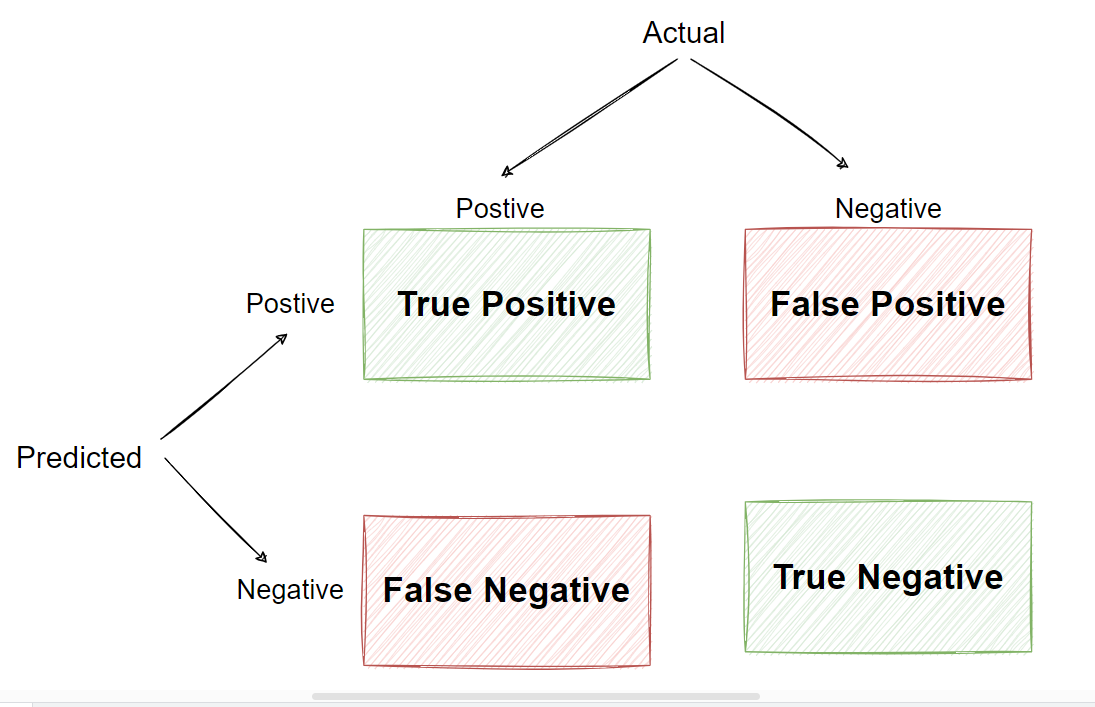

**Accuracy**:
$$
\text{accuracy} = \frac{tp + tn}{tp + tn + fp + fn}
$$

where:
- \(tp\) = true positives
- \(tn\) = true negatives
- \(fp\) = false positives
- \(fn\) = false negatives

**Precision**: 
$$
\frac{true positive}{true positive +  false positive}
$$
- High Precision: lower false positive rate

**Recall**: 
$$
\frac{true positive}{true positive +  false negative}
$$
- High Precision: lower false negative rate

**F1 Score**: 
$$
2 * \frac{precision * recall}{precision + recall}
$$

In [29]:
# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}: ") 
    print("====================================================================")
    print(classification_report(y_test, y_pred))
    print("====================================================================")

Classification Report for RandomForest: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212

Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.71      0.53      0.60        78
           2       0.51      0.92      0.66        86

    accuracy                           0.57       212
   macro avg       0.41      0.48      0.42       212
weighted avg       0.47      0.57      0.49       212

Classification Report for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.66      0.52      0.58        48
         

In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Overfitting and Underfitting

**Overfitting (High Bias and Low Variance)**  - Poor performance on both training and test data. <br/> 
**Overfitting (Low Bias and High Variance)** - Good performance on training data and poor performance on test data.

#### Bias-Variance Tradeoff
The goal is to find the right balance between bias and variance to minimize the total error (sum of bias squared, variance, and irreducible error).

- High Bias + Low Variance: Underfitting.
- Low Bias + High Variance: Overfitting.
- Optimal Balance: Neither underfitting nor overfitting, resulting in the best generalization to new data.

In [31]:
# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Classification reports
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.00
Test Accuracy: 1.00
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       351
           2       1.00      1.00      1.00       288

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



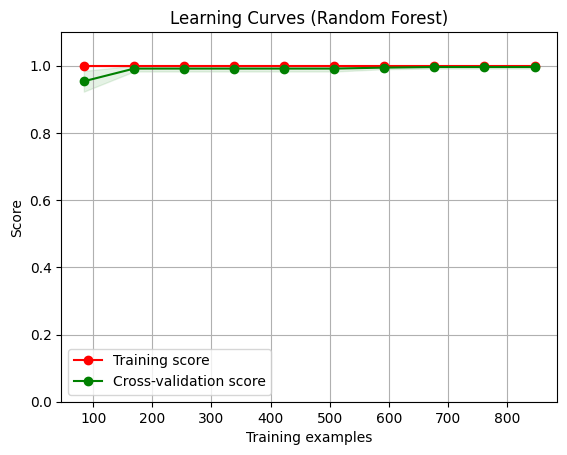

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()

# Plot the mean and fill the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


#### Plot Feature Importance 

In [33]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Plotly
fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importance for Random Forest Model', labels={'Importance': 'Importance', 'Feature': 'Feature'})

fig.show()

In [34]:
import pickle
with open('milkqty-0.1.0.pkl','wb') as f:
    pickle.dump(rf_model, f)   

In [38]:
# Use the milkqty saved model
with open('milkqty-0.1.0.pkl','rb') as f:
    model = pickle.load(f)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict with random values PH	Temperature	Taste	Odor	Fat	Turbidity	Colour
data = {
    'PH': [6.5],
    'Temperature': [25],
    'Taste': [1],
    'Odor': [1],
    'Fat': [1],
    'Turbidity': [1],
    'Colour': [1]
}

# Create a DataFrame from the data
data_df = pd.DataFrame(data)

# Make a prediction
prediction = model.predict(data_df)
print(f'Predicted Grade: {prediction[0]}')

# Decode the result
predicted_grade = label_encoder.inverse_transform(prediction)
print(f'Predicted Grade: {predicted_grade[0]}')

Test Accuracy: 1.00
Predicted Grade: 0
Predicted Grade: high


In [39]:
""" 
Write a predict_py similar to this one:
import sys
import json
import pandas as pd
import numpy as np
import pickle

# Load the model
with open('models\crop_recommendation.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

# Parse input data
try:
    input_data = json.loads(sys.argv[1])
    
    # Prepare the input in the required format for the model
    features = [
        float(input_data['nitrogen']),
        float(input_data['phosphorus']),
        float(input_data['potassium']),
        float(input_data['temperature']),
        float(input_data['humidity']),
        float(input_data['ph']),
        float(input_data['rainfall'])
    ]

    # Convert features to DataFrame with appropriate column names
    feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    features_df = pd.DataFrame([features], columns=feature_names)

    # Make prediction
    prediction = clf_loaded.predict(features_df)[0]

    # Convert prediction to standard Python type (int or str)
    if isinstance(prediction, (np.int32, np.int64)):
        prediction = int(prediction)

    # Print the prediction as JSON
    print(json.dumps(prediction))

except Exception as e:
    # Handle potential errors gracefully
    error_message = {'error': str(e)}
    print(json.dumps(error_message))

 """
import sys
import json
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy

# Load the model
with open('milkqty-0.1.0.pkl', 'rb') as f:
    model = pickle.load(f)


# Parse input data
try:
    input_data = json.loads(sys.argv[1])
    
    # Prepare the input in the required format for the model
    features = [
        float(input_data['PH']),
        float(input_data['Temperature']),
        float(input_data['Taste']),
        float(input_data['Odor']),
        float(input_data['Fat']),
        float(input_data['Turbidity']),
        float(input_data['Colour'])
    ]

    # Convert features to DataFrame with appropriate column names
    feature_names = ['PH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
    features_df = pd.DataFrame([features], columns=feature_names)

    # Make prediction
    prediction = model.predict(features_df)[0]

    # Convert prediction to standard Python type (int or str)
    if isinstance(prediction, (np.int32, np.int64)):
        prediction = int(prediction)

    # Print the prediction as JSON
    print(json.dumps(prediction))
    

' \nWrite a predict_py similar to this one:\n '